In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'gdrive/My Drive/MaskData1/Train'
valid_path = 'gdrive/My Drive/MaskData1/Test'

In [4]:
# useful for getting number of output classes
folders = glob('gdrive/My Drive/MaskData1/Train/*')
print(len(folders))

2


In [5]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('gdrive/My Drive/MaskData1/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1194 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('gdrive/My Drive/MaskData1/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 244 images belonging to 2 classes.


In [14]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
38/38 [==============================] - 726s 19s/step - loss: 2.3197 - accuracy: 0.6064 - val_loss: 0.5341 - val_accuracy: 0.7623
Epoch 2/50
38/38 [==============================] - 19s 494ms/step - loss: 0.6135 - accuracy: 0.6868 - val_loss: 0.4609 - val_accuracy: 0.7992
Epoch 3/50
38/38 [==============================] - 19s 490ms/step - loss: 0.5203 - accuracy: 0.7546 - val_loss: 0.3351 - val_accuracy: 0.8770
Epoch 4/50
38/38 [==============================] - 18s 486ms/step - loss: 0.4008 - accuracy: 0.8224 - val_loss: 0.3462 - val_accuracy: 0.8402
Epoch 5/50
38/38 [==============================] - 18s 483ms/step - loss: 0.3398 - accuracy: 0.8576 - val_loss: 0.3301 - val_accuracy: 0.8484
Epoch 6/50
38/38 [==============================] - 18s 481ms/step - loss: 0.3559 - accuracy: 0.8492 - val_loss: 0.3484 - val_accuracy: 0.8484
Epoch 7/50
38/38 [==============================] - 18s 486ms/step 

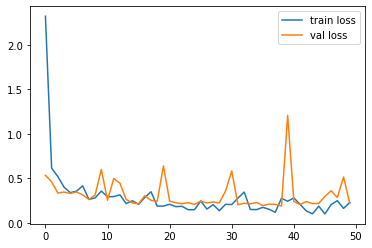

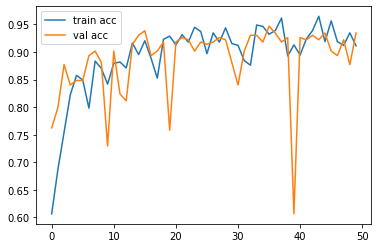

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
y_pred = model.predict(test_set)

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

[1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0
 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0
 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1
 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1
 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0]


In [22]:
# Save the Trained Model
#from tensorflow.keras.models import load_model

model.save('maskModel_resnet50.h5')